<a href="https://colab.research.google.com/github/mikful/dog-pose-estimation/blob/main/dev/fastai_blog_dog_pose_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 6 - Keypoint Regression

Dataset: 

https://github.com/noahcao/animal-pose-dataset

https://sites.google.com/view/animal-pose/



* Keypoint or **Pose** detection:
* `n` keypoints are found using a CNN where `n` = max number of keypoints present

## Libraries

In [ ]:
# Download dataset and json
# https://drive.google.com/drive/folders/1xxm6ZjfsDSmv6C9JvbgiGrmHktrUjV5x

!gdown --id 1Ge9jZppE9pGxqVyNAh6bWh4_ukffWBlF 
!gdown --id 1bAidtvR3MttetncXz0mfr47vYy7Uf5hm

Downloading...
From: https://drive.google.com/uc?id=1Ge9jZppE9pGxqVyNAh6bWh4_ukffWBlF
To: /content/images.zip
368MB [00:06, 59.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bAidtvR3MttetncXz0mfr47vYy7Uf5hm
To: /content/keypoints.json
2.36MB [00:00, 37.2MB/s]


In [ ]:
!unzip /content/images.zip

Archive:  /content/images.zip
   creating: images/
  inflating: images/2007_000063.jpg  
  inflating: images/2007_000175.jpg  
  inflating: images/2007_000332.jpg  
  inflating: images/2007_000392.jpg  
  inflating: images/2007_000464.jpg  
  inflating: images/2007_000491.jpg  
  inflating: images/2007_000504.jpg  
  inflating: images/2007_000528.jpg  
  inflating: images/2007_000549.jpg  
  inflating: images/2007_000676.jpg  
  inflating: images/2007_000720.jpg  
  inflating: images/2007_000783.jpg  
  inflating: images/2007_000799.jpg  
  inflating: images/2007_000836.jpg  
  inflating: images/2007_000876.jpg  
  inflating: images/2007_000904.jpg  
  inflating: images/2007_000925.jpg  
  inflating: images/2007_001073.jpg  
  inflating: images/2007_001185.jpg  
  inflating: images/2007_001416.jpg  
  inflating: images/2007_001225.jpg  
  inflating: images/2007_001239.jpg  
  inflating: images/2007_001299.jpg  
  inflating: images/2007_001340.jpg  
  inflating: images/2007_001397.jpg  

In [ ]:
!pip install --upgrade fastai -qq

     |████████████████████████████████| 186 kB 18.9 MB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 


In [ ]:
from fastai.vision.all import *

## Cleaning Some Data:

How is the data stored? Let's talk a look by walking on our folders:

In [ ]:
from pathlib import Path

In [ ]:
img_path = Path("/content/images")
imgs = img_path.ls()
imgs

(#4608) [Path('/content/images/2008_004538.jpg'),Path('/content/images/2009_004234.jpg'),Path('/content/images/2008_000358.jpg'),Path('/content/images/sh73.jpg'),Path('/content/images/2008_004396.jpg'),Path('/content/images/ca39.jpeg'),Path('/content/images/2010_000857.jpg'),Path('/content/images/2008_006063.jpg'),Path('/content/images/ho158.jpeg'),Path('/content/images/2010_001671.jpg')...]

In [ ]:
import json

# Load JSON file to dict
with open("/content/keypoints.json") as f:
    labels = json.load(f)

labels.keys()

dict_keys(['images', 'annotations', 'categories', 'info'])

In [ ]:
labels["images"]

{'1': '2007_000063.jpg',
 '2': '2007_000175.jpg',
 '3': '2007_000332.jpg',
 '4': '2007_000392.jpg',
 '5': '2007_000464.jpg',
 '6': '2007_000491.jpg',
 '7': '2007_000504.jpg',
 '8': '2007_000528.jpg',
 '9': '2007_000549.jpg',
 '10': '2007_000676.jpg',
 '11': '2007_000720.jpg',
 '12': '2007_000783.jpg',
 '13': '2007_000799.jpg',
 '14': '2007_000836.jpg',
 '15': '2007_000876.jpg',
 '16': '2007_000904.jpg',
 '17': '2007_000925.jpg',
 '18': '2007_001073.jpg',
 '19': '2007_001185.jpg',
 '20': '2007_001416.jpg',
 '21': '2007_001225.jpg',
 '22': '2007_001239.jpg',
 '23': '2007_001299.jpg',
 '24': '2007_001340.jpg',
 '25': '2007_001397.jpg',
 '26': '2007_001586.jpg',
 '27': '2007_001594.jpg',
 '28': '2007_001420.jpg',
 '29': '2007_001724.jpg',
 '30': '2007_001733.jpg',
 '31': '2007_001764.jpg',
 '32': '2007_001774.jpg',
 '33': '2007_001917.jpg',
 '34': '2007_001955.jpg',
 '35': '2007_002387.jpg',
 '36': '2007_002648.jpg',
 '37': '2007_003189.jpg',
 '38': '2007_001763.jpg',
 '39': '2007_003194.j

In [ ]:
labels["annotations"]

[{'bbox': [123, 115, 379, 275],
  'category_id': 1,
  'image_id': 1,
  'keypoints': [[193, 216, 1],
   [160, 217, 1],
   [174, 261, 1],
   [204, 186, 1],
   [152, 182, 1],
   [0, 0, 0],
   [0, 0, 0],
   [273, 168, 1],
   [0, 0, 0],
   [0, 0, 0],
   [0, 0, 0],
   [266, 225, 1],
   [0, 0, 0],
   [0, 0, 0],
   [0, 0, 0],
   [0, 0, 0],
   [0, 0, 0],
   [0, 0, 0],
   [190, 145, 1],
   [351, 238, 1]],
  'num_keypoints': 20},
 {'bbox': [25, 34, 419, 271],
  'category_id': 3,
  'image_id': 2,
  'keypoints': [[330, 84, 1],
   [245, 91, 1],
   [290, 137, 1],
   [340, 71, 1],
   [225, 91, 1],
   [325, 223, 1],
   [168, 196, 1],
   [0, 0, 0],
   [94, 134, 1],
   [325, 253, 1],
   [166, 256, 1],
   [0, 0, 0],
   [53, 188, 1],
   [0, 0, 0],
   [0, 0, 0],
   [0, 0, 0],
   [41, 209, 1],
   [285, 202, 1],
   [0, 0, 0],
   [0, 0, 0]],
  'num_keypoints': 20},
 {'bbox': [54, 50, 285, 262],
  'category_id': 4,
  'image_id': 3,
  'keypoints': [[275, 102, 1],
   [247, 105, 1],
   [269, 156, 1],
   [271, 71, 

In [ ]:
labels['categories']

[{'id': 1,
  'keypoints': ['left_eye',
   'right_eye',
   'nose',
   'left_ear',
   'right_ear',
   'left_front_elbow',
   'right_front_elbow',
   'left_back_elbow',
   'right_back_elbow',
   'left_front_knee',
   'right_front_knee',
   'left_back_knee',
   'right_back_knee',
   'left_front_paw',
   'right_front_paw',
   'left_back_paw',
   'right_back_paw',
   'throat',
   'withers',
   'tailbase'],
  'name': 'dog',
  'skeleton': [[0, 1],
   [0, 2],
   [1, 2],
   [0, 3],
   [1, 4],
   [2, 17],
   [18, 19],
   [5, 9],
   [6, 10],
   [7, 11],
   [8, 12],
   [9, 13],
   [10, 14],
   [11, 15],
   [12, 16]],
  'supercategory': 'animal'},
 {'id': 2,
  'keypoints': ['left_eye',
   'right_eye',
   'nose',
   'left_ear',
   'right_ear',
   'left_front_elbow',
   'right_front_elbow',
   'left_back_elbow',
   'right_back_elbow',
   'left_front_knee',
   'right_front_knee',
   'left_back_knee',
   'right_back_knee',
   'left_front_paw',
   'right_front_paw',
   'left_back_paw',
   'right_back_paw

In [ ]:
# we're interested in category = 1 for dog

labels['categories'][0]

{'id': 1,
 'keypoints': ['left_eye',
  'right_eye',
  'nose',
  'left_ear',
  'right_ear',
  'left_front_elbow',
  'right_front_elbow',
  'left_back_elbow',
  'right_back_elbow',
  'left_front_knee',
  'right_front_knee',
  'left_back_knee',
  'right_back_knee',
  'left_front_paw',
  'right_front_paw',
  'left_back_paw',
  'right_back_paw',
  'throat',
  'withers',
  'tailbase'],
 'name': 'dog',
 'skeleton': [[0, 1],
  [0, 2],
  [1, 2],
  [0, 3],
  [1, 4],
  [2, 17],
  [18, 19],
  [5, 9],
  [6, 10],
  [7, 11],
  [8, 12],
  [9, 13],
  [10, 14],
  [11, 15],
  [12, 16]],
 'supercategory': 'animal'}

Let's create our new data dict containg only dogs:


In [ ]:
dogs = [item for item in labels['annotations'] if item["category_id"] == 1]
dogs[0]

{'bbox': [123, 115, 379, 275],
 'category_id': 1,
 'image_id': 1,
 'keypoints': [[193, 216, 1],
  [160, 217, 1],
  [174, 261, 1],
  [204, 186, 1],
  [152, 182, 1],
  [0, 0, 0],
  [0, 0, 0],
  [273, 168, 1],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [266, 225, 1],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [190, 145, 1],
  [351, 238, 1]],
 'num_keypoints': 20}

In [ ]:
# get the image filename from our first item

labels["images"][str(dogs[0]["image_id"])]

'2007_000063.jpg'

In [ ]:
len(dogs)

1771

Let's count key many visible keypoints there are per dog:

In [ ]:
from collections import Counter

def count_num_kps():
    dog_kps = [dog["keypoints"] for dog in dogs]
    visible_kps = [len([kp[:2] for kp in dog if kp[2] == 1]) for dog in dog_kps]
    # len_visible_kps = [len(vis_kp) for vis_kp in visible_kps]
    return Counter(visible_kps)
    

count_num_kps()

Counter({0: 2,
         1: 3,
         2: 8,
         3: 19,
         4: 45,
         5: 91,
         6: 120,
         7: 119,
         8: 80,
         9: 102,
         10: 116,
         11: 124,
         12: 143,
         13: 118,
         14: 125,
         15: 144,
         16: 140,
         17: 109,
         18: 83,
         19: 49,
         20: 31})

## DataBlock and Train

In [ ]:
# let's define our image and keypoint label getter functions

img_path = Path("/content/images")

def get_img(dog):
    """
    Pass in the dog item from our list "dogs" and return filename
    """
    filename = str(labels["images"][str(dog["image_id"])])
    return img_path/filename

def get_kps(dog):
    """
    Pass in the dog item from our list "dogs" and return the keypoints
    """

    # remove 0 (not visible) and 1 (visible) at idx 2 for each keypoint in list
    # to only return visible keypoints
    kps = dog["keypoints"]
    kps = [kp[:2] for kp in kps] # if kp[2] == 1]
    return kps

We'll also talk about the "Clamping" option. This can be useful for more than our ground truth. Consider this case:

* RandomResizeCrop crops our image and makes the point go off-screen. Do we keep the point and let the model guess, or adjust that point?

Let's build transform to adjust for this (our dataset will not use this but this is for an example) as we will use either **padding** or **squishing** on our resize

In [ ]:
class ClampBatch(Transform):
  "Clamp points to a minimum and maximum in a batch"
  order = 4
  def __init__(self, min=-1, max=1, **kwargs):
    super().__init__(**kwargs)
    self.min, self.max = min, max
  def encodes(self, x:(TensorPoint)):
    for i, sets in enumerate(x):
      for j, pair in enumerate(sets):
        cpnt = torch.clamp(pair, self.min, self.max)
        if any(cpnt>=1) or any(cpnt<=-1):
          x[i][j] = tensor([-1,-1])
    return x

We'll go ahead and run `ClampBatch` here though just in case something happens during one of our transforms (though most likely not)

In [ ]:
item_tfms = [Resize(448, method='squish')]
batch_tfms = [Flip(), Rotate(), Zoom(), Warp(), ClampBatch()]

All Keypoint agumentation available:
* Rotate, FlipItem, DihedralItem
* CropPad, RandomCrop, Resize, RandomResizeCrop
* Zoom, Warp

In [ ]:
dblock = DataBlock(blocks=(ImageBlock, PointBlock),
                   get_x=get_img,
                   splitter=RandomSplitter(),
                   get_y=get_kps,
                   item_tfms=item_tfms,
                   batch_tfms=batch_tfms)

In [ ]:
bs=1

With how our `get_y` is, we will want a base path of ''. Let's look at a `dblock.summary()` output now to see what's going on in our `Pipeline`

In [ ]:
dblock.summary(dogs)

Setting-up type transforms pipelines
Found 1771 items
2 datasets of sizes 1417,354
Setting up Pipeline: get_img -> PILBase.create
Setting up Pipeline: get_kps -> TensorPoint.create

Building one sample
  Pipeline: get_img -> PILBase.create
    starting from
      {'image_id': 3442, 'bbox': [107, 86, 435, 358], 'keypoints': [[145, 119, 1], [124, 116, 1], [116, 138, 1], [174, 104, 1], [126, 96, 1], [234, 243, 1], [0, 0, 0], [370, 229, 1], [0, 0, 0], [240, 285, 1], [200, 290, 1], [406, 289, 1], [343, 282, 1], [235, 341, 1], [192, 345, 1], [391, 341, 1], [333, 327, 1], [153, 160, 1], [236, 143, 1], [378, 165, 1]], 'num_keypoints': 20, 'category_id': 1}
    applying get_img gives
      /content/images/2011_001389.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: get_kps -> TensorPoint.create
    starting from
      {'image_id': 3442, 'bbox': [107, 86, 435, 358], 'keypoints': [[145, 119, 1], [124, 116, 1], [116, 138, 1], [174, 104, 1], [126, 96, 1], [234,

This is cool! It shows us exactly what is happenning when, and if a transform doesn't work we can go through and adjust and debug through it! Since it was successfull in building a batch, let's build our `DataBunch`

In [ ]:
dls = dblock.dataloaders(dogs, bs=bs)

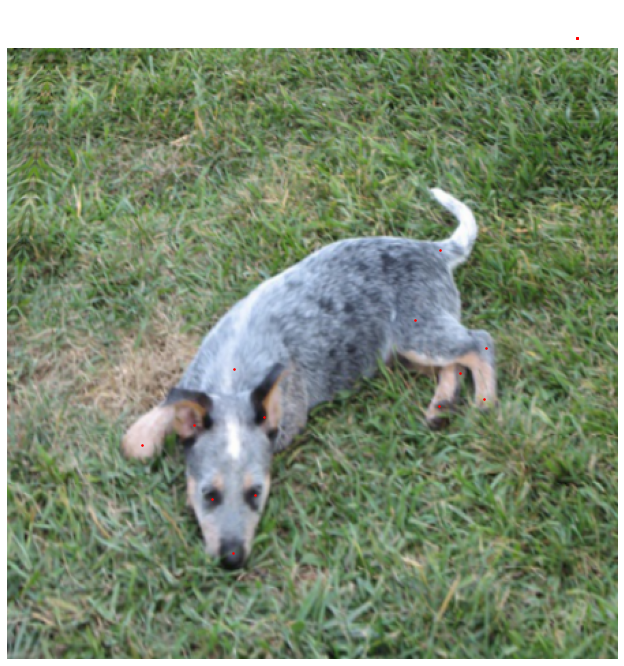

In [ ]:
dls.show_batch(max_n=8, figsize=(12,12))

Great, now let's give it a `.c` attribute so we can create our model's output easier

In [ ]:
dls.c = dls.train.after_item.c

In [ ]:
dls.c

40

Now let's go through and generate a custom model and head for regression, but how do we do this?

If we know our outputs and inputs, we can make use of two functions, `create_body`, and `create_head`. `create_body` will chop the top of our pre-trained model for us, and `create_head` will make a special `fastai` configured head that has shown to work better. What will we need?

* Outputs: 18 (9 pairs of points)
* Inputs: 1024 filter (2x the last ResNet18 layer)

In [ ]:
body = create_body(resnet18, pretrained=True)

In [ ]:
body[-1][-1]

BasicBlock(
  (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

Now let's make our head

In [ ]:
head = create_head(nf=1024, n_out=18); head

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=2048, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=18, bias=False)
)

Finally, we'll wrap them together

In [ ]:
arch = nn.Sequential(body, head)

Now we want to utilize transfer learning as best as we can, so we need those discrimitive learning rates. How do we do this? We need to define what this should look like. Here is what it is for our resnet (this is to your discretion based on what you find)

In [ ]:
def _resnet_split(m): return L(m[0][:6], m[0][6:], m[1:]).map(params)

In [ ]:
arch[1:]

Sequential(
  (1): Sequential(
    (0): AdaptiveConcatPool2d(
      (ap): AdaptiveAvgPool2d(output_size=1)
      (mp): AdaptiveMaxPool2d(output_size=1)
    )
    (1): Flatten(full=False)
    (2): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=4096, out_features=512, bias=False)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=512, out_features=40, bias=False)
  )
)

We can see that the `[1:]` grabs the head of our model, and we can safely freeze the body

Lastly we want to initialize our model

In [ ]:
apply_init(arch[1], nn.init.kaiming_normal_)

For our loss funciton, we will use `MSELossFlat`

Now that we have all the pieces, let's make a model!

In [ ]:
learn = Learner(dls, arch, loss_func=MSELossFlat(), splitter = _resnet_split,
                opt_func=ranger)

In [ ]:
learn.freeze()

And let's fit!

In [ ]:
learn.lr_find()

RuntimeError: ignored

In [ ]:
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,time
0,0.155805,0.079843,02:02
1,0.121360,0.075804,02:02
2,0.057329,0.031406,02:02
3,0.029215,0.014585,02:01
4,0.017399,0.010925,02:04


Let's look at some of the initial results

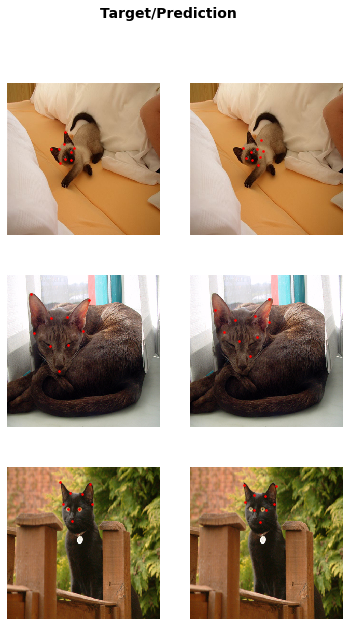

In [ ]:
learn.show_results()

Alright, we're getting there! Let's unfreeze and find a new learning rate

In [ ]:
learn.unfreeze()

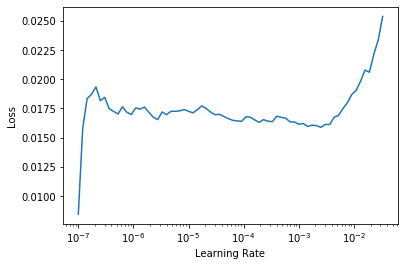

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_flat_cos(5, 1e-4)

epoch,train_loss,valid_loss,time
0,0.013294,0.008114,02:07
1,0.012472,0.006793,02:06
2,0.010956,0.006156,02:07
3,0.010989,0.005755,02:06
4,0.009330,0.005135,02:06


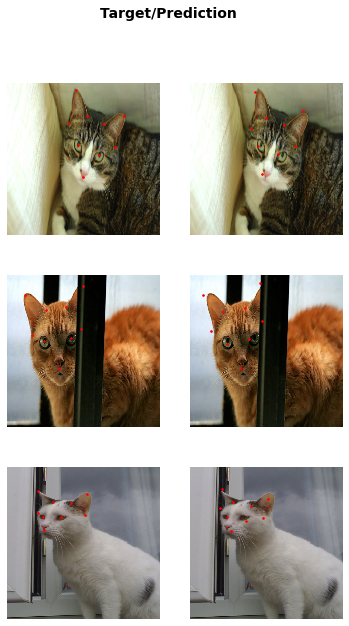

In [ ]:
learn.show_results()

Looks much better! And in only ten epochs! (most anything I've seen with this sort of problem in `PyTorch` fits for 100+ epochs)